# Convex functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic properties and definitions

A function $f: \mathbf{R}^{n}\to \mathbf{R}^{}$ is convex if $\mathbf{dom} f$ is a convex set, and 

\begin{equation}
f(\theta x + (1-\theta) y) \leq \theta f(x) + (1-\theta) f(y)
\label{eq:convexity_def}
\end{equation}

for all $x,y \in \mathbf{dom} f$, $0\leq \theta\leq 1$.

The mental picture for this is:

![cvx fn mental](convex_img/cvx_fn_mental_img.jpg)

A function doesn't have to be bowl-shaped to be convex, but it must have positive curvature.

$f$ is *concave* if $-f$ if convex.

**Examples on** $\mathbf{R}$

>"The question as to whether or not a function on $\mathbf{R}$ is convex is a non-issue. Here's how you check: you draw it and you use your eyeballs to see if it curves up. There's really no issue there." - Stephen Boyd

**Examples on** $\mathbf{R}^n$ **and** $\mathbf{R}^{n\times m}$

*Norms*

Every norm on $\mathbf{R}^n$ is convex.

**Restriction of a convex function to a line**

A function $f:\mathbf{R}^{n}\to \mathbf{R}^{}$ is convex iff and only if the
function $g:\mathbf{R}^{}\to \mathbf{R}^{}$,

\begin{equation}
g(t) = f(x + tv),\qquad \mathbf{dom}\,g = \left\{t\mid x + tv \in\mathbf{dom} f\right\}
\end{equation}

is convex (in $t$) for any $x\in \mathbf{dom} f$, $v\in \mathbf{R}^{n}$.

This means we can check the convexity of $f$ by checking the convexity of one variable at a time. The only hitch is that there are infinite such lines. But if we can show that the function is convex on an *arbitrary* line, then we're done.



### Extended-value extensions

The extended-value extension $\tilde{f}$ of $f$ is 

\begin{equation}
\tilde{f}(x) = 
\begin{cases}
f(x) & x \in \mathbf{dom} f\\
\infty & x \notin \mathbf{dom} f
\end{cases}
\end{equation}

For accounting purposes, it's often useful to work with the extended-value
extension of a function rather than the function itself. $\tilde{f}$ is defined on the whole space, so we don't need to worry about domain restriction.

![extended value function](convex_img/extended_value_function.jpg)

This can also simplify notation: for example, instead of writing out the full conditions for convexity in equation (\ref{eq:convexity_def}), where we demand that $\mathbf{dom} f$ is a convex set and $x,y\in\mathbf{dom} f$, we can instead write 

\begin{equation}
0\leq\theta\leq1 \implies \tilde{f}(\theta x + (1-\theta)y) \leq \theta
\tilde{f}(x) +(1-\theta)\tilde{f}(y)
\end{equation}

for *any* $x,y$.

Similarly, to express the pointwise sum $f$ of two functions $f_1$ and $f_2$, we
would have to write that $f = f_1 + f_2$ is the pointwise sum function **with
the domain** $\mathbf{dom}f = \mathbf{dom} f_1 \cap \mathbf{dom} f_2$. Using
the extended-value extension, we can simply say that for any $x$, 

\begin{equation}
\tilde{f}(x) = \tilde{f}_1(x) + \tilde{f}_2(x).
\end{equation}


### First-order conditions

There's this idea that if $f$ differentiable (i.e., its gradient $\nabla f$ exists at each point in $\mathbf{dom} f$, which is open), then $f$ is convex if and and only if

- its domain is convex
- $f(y) \geq f(x) + [\nabla f(x)]^T(y-x)$ for all $x,y\in\text{dom}(f)$ 
 
The first point is the interpretation of $f(x) + [\nabla f(x)]^T(y-x)$. To understand this, fix $x$,

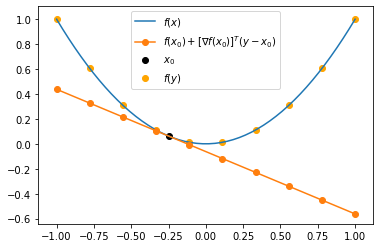

In [2]:
def f(x): return x**2
def grad_f(x): return 2*x

x0 = -0.25
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 10)

plt.plot(x, f(x),label=r'$f(x)$')
plt.scatter(x0, f(x0), c='k', label=r'$x_0$')
plt.plot(y, f(x0) + grad_f(x0)*(y-x0), '-o',
        label=r'$f(x_0) + [\nabla f(x_0)]^T(y-x_0)$')
plt.scatter(y, f(y), label=r'$f(y)$', c='orange')
plt.legend()
plt.show()

we see that 
- the inequality is respected
- that $f(x) + [\nabla f(x)]^T(y-x)$ is an affine function in $y$ for any given $x$, which specifies the linear Taylor approximation to the function at the point $x$.

In higher dimensions, this says that the plane tangent to the function lies below the function.

### Second-order conditions

We now assume that $f$ is twice differentiable, i.e., its *Hessian* or second derivative matrix $\nabla^2 f$ exists on each point in $\mathbf{dom} f$, which is open.

If these conditions are met, then $f$ is convex if and only if

- $\mathbf{dom} f$ is convex
- $\nabla^2 f \succeq 0$ for all $x\in \mathbf{dom} f$.

Where the Hessian matrix $H$ is defined as 

\begin{equation}
H_{ij}=\nabla^2 f(x)_{ij} = \frac{\partial^2 f(x) }{\partial x_i \partial x_j},
\qquad i,j = 1,\ldots,n
\end{equation}

not to be confused with the Laplacian operator $\nabla \cdot \left( \nabla f(x) \right)$.

**Remark**

The condition that $\mathbf{dom} f$ be convex cannot be dropped from the
first or second order characterizations of convexity. For example, consider the
function $f(x) = 1/x^2$ with $\mathbf{dom} f = \left\{x \in \mathbf{R}^{}\mid x\neq 0\right\}$ satisfies $f^{\prime\prime}(x) > 0$ for all $x\in \mathbf{dom} f$, but is not a convex function.

![cvs dom remark](convex_img/convex_domain_remark.jpg)

Generally, checking convexity this way is to be avoided, as it can be quite complicated, especially for vector-valued function (see exercises).

**Remark** 

If a function is convex in each component, the diagonals of the Hessian will be positive. However, this says nothing about the convexity of the function in general (which has to do with the off diagonals). We have to check convexity over *every line*, not just in each component.


### Useful examples to remember

### Sublevel sets

The $\alpha$-sublevel set of $f:\mathbf{R}^{n}\to\mathbf{R}^{}$:

\begin{equation}
C_\alpha = \left\{x \in \mathbf{dom} f \mid f(x) \leq \alpha\right\}.
\end{equation}

Note that sublevel sets are subsets of the *domain*, not the function.
![sublevel dom](convex_img/sublevel_domain.jpg)

Sublevel sets of a convex function are convex, for any value of $\alpha$. The proof follows from the definition of convexity.

If $x,y\in C_\alpha$, then both $f(x)$ and $f(y)$ are below $\alpha$. Since $f$ is convex, $f(\theta x + (1-\theta)y) \leq \alpha$ as well and therefore $\theta x + (1-\theta)y\in C_a$, proving convexity. 

The mental picture is:
![sublevel cvx](convex_img/sublevel_convex.jpg)

The converse is false. A function can have all of its sublevel sets convex but not be a convex function. As a counterexample, take $f(x) = e^{-x}$.
![sublevel converse](convex_img/sublevel_converse.jpg)

### Epigraph
The graph of a function $f:\mathbf{R}^{n}\to \mathbf{R}^{}$ is defined as 

\begin{equation}
\left\{(x,f(x)) \mid x\in \mathbf{dom} f\right\}
\end{equation}

The *epigraph* of a function $f:\mathbf{R}^{n}\to \mathbf{R}^{}$ is defined as 

\begin{equation}
\mathbf{epi} f = \left\{(x,t)\in \mathbf{R}^{n+1} \mid
x\in\mathbf{dom} f,\, f(x) \leq t\right\}.
\end{equation}

So the epigraph is the entire set above the graph. The mental picture is:
![epigraph](convex_img/epigraph.jpg)

$f$ is convex if and only if $\mathbf{epi} f$ is a convex set.

### Jensen's inequality and extensions

The basic inequality in equation (\ref{eq:convexity_def}) is: 

\begin{equation}
f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta) f(y)
\end{equation}

Sometimes this is called *Jensen's inequality* and it has tons of extensions. One generality is that if $f$ is
convex, then 

\begin{equation}
f\left(\mathbf{E}(z)\right) \leq \mathbf{E}f(z)
\end{equation}

for any random variable $z$.


## Operations that preserve convexity

### Nonnegative weighted sums

We can use some of the properties of convex sets to derive results about operations that preserve convexity of functions. 

**Scaling a function**

Scaling a convex function $f$ by $w \geq 0$  preserves convexity. This should be
easy to imagine, but the proof is quick:

\begin{equation}
f \text{ convex } \implies
w f(\theta x + (1-\theta)y) \leq w\theta f(x) + w(1-\theta) f(y)
\end{equation}

which suffices to show the convexity of $wf$.

Of course, the "nonnegative" part is vital. For example, scaling by -1 would make the function concave, and would not preserve convexity. Algebraically, in the proof, scaling by -1 would flip the inequality.

**Sum of two functions**

If two functions $f_1$ and $f_2$ are convex, then so is their sum. 

We will show this a few ways. The first way is simply by applying the definition of function convexity directly. Let $f_1,$ and $f_2$ be arbitrary convex functions and arbitrarily choose $x,y\in \mathbf{dom}f_1, f_2$ and $\theta \in [0,1]$. Let $g = f_1 + f_2$, then

\begin{align}
f_1(\theta x + (1-\theta)y) &\leq \theta f_1(x) + (1-\theta)f_1(y) \\
f_2(\theta x + (1-\theta)y) &\leq \theta f_2(x) + (1-\theta)f_2(y) \\
\implies
g(\theta x + (1-\theta)y) & \leq \theta g(x) + (1-\theta) g(y)
\end{align}

which shows convexity directly, since it's the same as writing

\begin{equation}
(f_1 + f_2)(\theta x + (1-\theta)y) = \theta(f_1 + f_2)(x) +
(1-\theta)(f_1+f_2)(y)
\end{equation}



While the proof is certainly short, it doesn't really provide any insight into the geometric reason why convexity is preserved. The visual reason is for why the proof works is that in order to break convexity of the sum, you would have to violate convexity for at least $f_1$ or $f_2$.

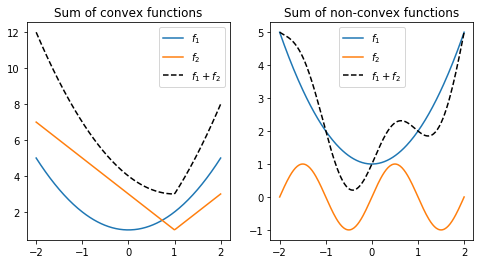

In [3]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
x = np.linspace(-2,2,200)
f1 = x**2 + 1
f2 = 2*np.abs(x - 1) +1
f3 = np.sin(np.pi*x)
for ax, _f in zip(axes, [f2, f3]):
    ax.plot(x, f1, label=r'$f_1$');ax.plot(x, _f, label=r'$f_2$')
    ax.plot(x, f1+ _f, 'k--', label=r'$f_1 + f_2$')
    ax.legend();
axes[0].set_title('Sum of convex functions'); 
axes[1].set_title('Sum of non-convex functions');
plt.show()

**Epigraph arguments for scaling and sums**

The geometric arguments is more mentally convincing and easy to remember than the proofs. Indeed, there is a more elegant argument that proves each claim using an epigraph argument. 

We know that a function is convex if and only if its epigraph is a convex set.
We also know that the image of any convex set under an affine transformation is
convex.

So for scaling:

\begin{equation}
\mathbf{epi}(wf) 
=
\begin{bmatrix}
I & 0 \\
0 & w
\end{bmatrix}
\mathbf{epi}(f)
=
\begin{bmatrix}
I & 0 \\
0 & w
\end{bmatrix}
\begin{bmatrix}
x \\
t \mid t \geq wf(x)
\end{bmatrix}
\end{equation}

Since we wrote $\mathbf{epi}(wf)$ as an affine transformation of a convex set,
it's convex and hence so is $wf$.


For sums:
\begin{equation}
\mathbf{epi}(f_1 + f_2) 
=
\begin{bmatrix}
I & 0 & 0 \\
0 & 1 & 1 
\end{bmatrix}
\begin{bmatrix}
x \\
t \mid t \geq f_1(x) \\
t \mid t \geq f_2(x)
\end{bmatrix}.
=
\begin{bmatrix}
I & 0 \\
0 & w
\end{bmatrix}
\left\{\mathbf{epi}f \times \left\{t| t\geq
f_2(x)\right\}\right\}
\end{equation}

where the set $\left\{\mathbf{epi}f \times \left\{t| t\geq
f_2(x)\right\}\right\}$ is convex since it is the tensor product of two convex
sets.






**Result for nonnegative weighted sums of functions**

Since we have shown that applying nonnegative scaling and sums to convex
functions preserves convexity, it should be clear that we can iteratively apply
the scaling and sum procedures to conclude that any sum of weighted convex
functions (where weights are nonnegative) will be a convex function:

\begin{equation}
f = w_1 f_1 + \ldots + w_n f_n \;\;\text{ is convex, }
\qquad \text{ for } w_i \geq 0,\, f_i \text{ convex }
\end{equation}



**Generalization to integrals**

We can take this result and apply it to an infinite sum of functions, giving a
result for general integrals.

If $f(x,y)$ is convex in $x$ for each $y \in \mathcal{A}$, and $w(y) \geq 0$ for
each $y\in \mathcal{A}$, then the funtion $g(x)$ defined as 

\begin{equation}
g(x) = \int_{A}^{} w(y) f(x,y) \,dy 
\end{equation}

is convex in $x$ (provided that the integral exists).

We can see how the threads of logic from the earlier conclusions are used to
build this result.

The key to understanding this statement to recognize that $y$ is just a dummy variable that indexes the sum. Note that discretely, we would replace the integration over $y$ with the sum 

\begin{equation}
g(x) = \sum_{y=1}^{n} w_y f_y(x) 
\qquad \text{ (discrete analogue) }
\end{equation}

from which we can see

- $w(y)$ must be nonnegative over the entire region of integration
$\mathcal{A}$ to not to flip a convex function into a concave one.
- $f(x,y)$ must be convex in $x$ for each $y\in\mathcal{A}$ just like we
demanded that every function $f_y(x)$ in the sum must be convex. 


### Composition with affine mapping

Intuitively, it should make sense that any affine transformation of the domain of a convex function should not affect its convexity. Rotating and scaling $\mathbf{dom} f$ should not affect the "bowl shapeness" of $\mathbf{epi} f$ sitting "above".

To illustrate this point, we take the specific example of 

\begin{equation}
f(x,y) = x^2 + 2y^2
\end{equation}

And the composition with the matrix $A$

\begin{equation}
\begin{bmatrix}
0 & 1 \\
-1 & 1
\end{bmatrix}
\end{equation}

to form the affine composition
\begin{equation}
g = f(Ax) = f(y, -x + y) = 2x^2 + 3y^2 -4xy
\end{equation}



In [4]:
f = lambda x,y: x**2 + 2*y**2
f2 = lambda x,y: 3*y**2 + 2*x**2 - 4*x*y
x = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,x)
Z = f(X,Y)

In [5]:
A = np.array([[0,  1],
              [-1, 1]])
b = np.array([0,0])

In [6]:
# compute the transform of the domain
XX = np.stack(np.meshgrid(x,x))
trans = np.einsum('ij,jkl', A, XX) + b[:,np.newaxis, np.newaxis]
tX, tY = trans[0,...], trans[1,...]
tZ = f(tX, tY)

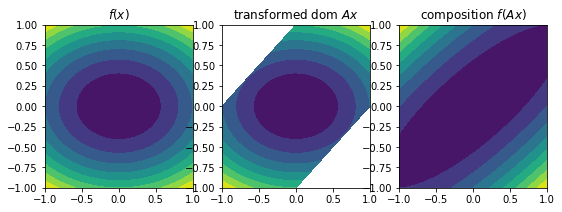

In [7]:
fig, ax = plt.subplots(1,3, figsize=(9, 3))

ax[0].set_title(r'$f(x)$');
ax[0].contourf(X, Y, Z, levels=np.linspace(0,3,10))
ax[1].set_title(r'transformed dom $Ax$')
ax[1].set_xlim([-1,1]); ax[1].set_ylim([-1,1])
ax[1].contourf(tX, tY, f(tX, tY), levels=np.linspace(0,3,10))
ax[2].set_title(r'composition $f(Ax)$')
ax[2].contourf(X, Y, f2(X,Y), levels=np.linspace(0,9,10))
plt.show()

This is the intuition for the following result

**Composition with an affine mapping preserves convexity**

Let $f:\mathbf{R}^{n}\to R$, $A\in \mathbf{R}^{n\times m}$, and $b\in
\mathbf{R}^{n}$. Define the affine composition

\begin{equation}
g(x) = f(Ax + b), \qquad \mathbf{dom}\,g = \left\{x \mid Ax + b \in \mathbf{dom}
f\right\}.
\end{equation}

Then if $f$ is convex, so is $g$.

*Examples*

*Log barrier for linear inequalities*

\begin{equation}
f(x) = - \sum_{i=1}^{m} \log\left(b_i - a_i^T x\right), \qquad \mathbf{dom} f =
\left\{x \mid a_i^T x < b_i,\, i=i,\ldots,m\right\}
\end{equation}

Is convex, because the function

\begin{equation}
\phi(z) = \sum_i - \log(z_i)
\end{equation}

is a convex function, since $log(z)$ is concave and sums of convex functions are
convex. Then $f(x)$ is the convex function $\phi$(z) precomposed with an affine
function $b_i - a_i^T x$ and hence is convex also.



### Pointwise maximum

*Result*
If two functions $f_1$ and $f_2$ are convex, then their pointwise maximum

\begin{equation}
f(x) = \max\left\{f_1(x),\, f_2(x)\right\}
\end{equation}

with $\mathbf{dom}f = \mathbf{dom}f_1 \cap \mathbf{dom} f_2$ is also convex.

*Mental pictures*

As with nonnegative weighted sums, this idea is easier for me to think about graphically rather than algebraically.

![pointwise max ex1](convex_img/pointwise_max_ex1.jpg)

The figure above shows a good mental image of the pointwise maximum idea.  We take the pointwise maximum of $f_1=x^2$ and $f_2 = 1/x$.  The shaded region is the epigraph of the pointwise maximum, and we see that the domain of the pointwise max has been restricted to only $\mathbf{R}^{}_+$.

We can also see why we need both to be convex. Clearly, if the greater function is not convex, it will violate the convexity of the pointwise max.

![pointwise max ex2](convex_img/pointwise_max_ex2.jpg)

*Proof*

In this section we write out the proof, which is pretty straightforward. Take $f_1,f_2$ convex, $f=\max\left\{f_1,f_2\right\}$, and $x,y\in \mathbf{dom} f$.

\begin{align}
f(\theta x + (1-\theta)y 
&= \max\left\{f_1(\theta x + (1-\theta)y), f_2(\theta x + (1-\theta) y)\right\} \\
&\leq \max\left\{\theta f_1(x) + (1-\theta)f_1(y),\,
\theta f_2(x) + (1-\theta)f_2(y) \right\} \\
&\leq \theta \max\left\{f_1(x), f_2(x)\right\} + (1-\theta) \max\left\{f_1(y),
f_2(y)\right\} \\
&= \theta f(x) + (1-\theta) f(y)
\end{align}


*Extensions*

Since we can successively take pointwise maxima, this result holds for an arbtrary number of functions. If $f_1,\ldots,f_m$ are convex, then their
pointwise maximum

\begin{equation}
f(x) = \max \left\{f_1(x),\ldots,f_m(x)\right\}
\end{equation}

is also convex.



**Examples**

*Max of Linear Functions*

This example is sort of lame, but since hyperplanes are convex (indeed, affine) functions, taking the pointwise maximum of a set of linear functions results in a piecewise, linear convex function (see diagram).

![pointwise max ex3](convex_img/pointwise_max_ex3.jpg)

It's not an incredibly profound statement, since it's really the pointwise maximum function that's ensuring convexity, but it is nonetheless true that the function

\begin{equation}
f(x) = \max\left\{a_1^T x + b_1,\ldots, a_L^T x + b_L \right\}
\end{equation}

defines a piecewise-linear convex function (with $L$ or fewer regions).

*Sum of* $r$ *largest components*

For a vector $x\in\mathbf{R}^{n}$, the function that sums the $r$ largest components (take $x$ to be sorted largest-to-smalles without loss of generality):

\begin{equation}
f(x) = \sum_{i=1}^{r} x_{[i]}
\end{equation}

is a convex function.

It is a convex function because if represents the pointwise maximum of all the functions that sum $r$ distinct components of $x$, that is

\begin{equation}
f(x) = \max\left\{x_{i_1} + \ldots + x_{i_r} \mid 1\leq i_1 < i_2 <\ldots < i_r
\leq n\right\}
\end{equation}

Which is another way of saying of all the $n!/(r!(n-r)!)$ ways to sum $r$ components of $x$, $f(x)$ is their pointwise maximum, hence convex.

This example is interesting because although $f(x)$ is non-differentiable and non-smooth in terms of $x$ but is nonetheless convex in $x$.



### Pointwise supremum

We can generalize the result that the pointwise maximum $f$ over a set of $m$ convex functions $f_1,\ldots f_m$ is convex to the pointwise supremum over an infinite set of convex functions. 

*The generalized result:*

If, for each $y\in A$, a function $f(x,y)$ is convex in $x$, then the function

\begin{equation}
g(x) = \sup_{y\in A} f(x,y)
\end{equation}

is convex in $x$.

The way to think about this is a set of convex functions parametrized by a continuous value $y$. We have to be a bit careful about the domain, just as we did for the pointwise max of functions which might not share a common domain. Here we make sure that he domain of $f$ contains only $x,y$ pairs which make sense.

\begin{equation}
\mathbf{dom}\, g = \left\{x \mid (x,y)\in \mathbf{dom}f \text{ for all } y\in
A,\, \sup_{y\in A} f(x,y) < \infty\right\}
\end{equation}

Take $g(x) = \sup_{y\in[0,1]} x/y$

*Proof*

We prove the claim using an epigraph argument. The epigraph of $g$ can be written as an intersection of epigraphs.

\begin{equation}
\mathbf{epi}\, g = \bigcap_{y\in A} \mathbf{epi} f(\cdot,y).
\end{equation}

and since any intersection of convex sets is convex, so is $\mathbf{epi}\, g$, which is sufficient to show convexity.

**Examples**

*Distance to the farthest point of a set*

Let $C \subseteq \mathbf{R}^{n}$. The distance in any norm to the farthest point of $C$ can be written as 

\begin{equation}
f(x) = \sup_{y\in C} \left\Vert x - y\right\Vert
\end{equation}

This function is convex, because for any fixed $y\in C$, $\left\Vert x-y_0\right\Vert$ is convex in $x$ (since all norms are convex). So we can take the supremum over all choices of $y\in C$ and use the pointwise supremum result to assert convexity.

*Maximum eigenvalue of a symmetric matrix*

The function $f(X) = \lambda_{max}(X)$, with $\mathbf{dom} f = S^m$, is convex.

To see this, we express $f$ as 

\begin{equation}
f(X) = \sup\left\{y^T X y \mid \;\; \left\Vert y\right\Vert_{2} = 1 \right\}
\end{equation}

In my opinion, this isn't a great example because it's sort of an obscure linear algebra fact that the largest eigenvalue can be written this way, but sure, if you see it, you're done.



**Converse: representation of convex function as pointwise supremum of affine
functions**

We've seen arguments for convexity by expressing the function as the pointwise supremum of convex functions.  We make a small remark about going in reverse.  Almost every convex function (except for a technical condition explained in Boyd, need more details) can be expressed as a pointwise supremum of a family of affine functions. The proof is sort of long, but boils down to the following idea:

Every convex function has an epigraph which is a convex set. Every convex set has a supporting hyperplane at every boundary point. So we can represent the convex function by taking the pointwise supremum over all affine global underestimators (see illustration).

![cvx glob under](convex_img/cvx_fn_via_aff_sup.jpg)

### Composition
#### Scalar composition

The intuitive way to think about composition is to reduce it to the scalar case
and look at the second derivative using the chain rule. Let $f(x) = h(g(x))$ be
a scalar functional composition.

\begin{align}
f^\prime(x) &= h^\prime(g(x)) g^\prime(x) \\
f^{\prime\prime}(x) 
&= h^{\prime\prime}(g(x)) \left[g^\prime(x)\right]^2 
+ h^\prime(g(x)) g^{\prime\prime}(x)
\end{align}

Then the question is, what needs to be true of $h(x)$ and $g(x)$ in order for
$f(x)$ to be convex. If $h(x)$ and $g(x)$ are convex, then

\begin{equation}
f^{\prime\prime}(x) = 
\underbrace{h^{\prime\prime}(g(x))}_{\geq 0 \,\text{ since } h \text{ convex}}
\underbrace{\left[g^\prime(x)\right]^2 }_{\geq 0 }
+ \underbrace{h^\prime(g(x)) }_{?}
\underbrace{g^{\prime\prime}(x)}_{\geq 0 \text{ since } g \text { convex}}
\end{equation}

So to make $f^{\prime\prime}\geq 0 $ (and hence $f$ convex), we need
$h^{\prime}(g(x)) \geq 0 $, that is, we need $h^\prime(\cdot) \geq 0$ or $h$ to
be nondecreasing. This gives us the final rule:

*a nondecreasing convex function of a convex function is convex.*

Now it turns out that these types of composition rules hold for non-differentiable, non-scalar functions $g,h$. But the way to think about or rederive the rules is to re-write out the scalar case and consider the signs.

*Example:* $\exp g(x)$

The function $\exp g(x)$ is convex if $g(x)$ is convex. This says that the exponential function preserved positive curvature; if a function curves up, the exponential of the function also curves up.

#### An important subtlety about the general rule

#### Vector-valued composition

The vector-valued composition $f$ of $g:\mathbf{R}^{n}\to\mathbf{R}^{k}$ and $h:\mathbf{R}^{k}\to R$, that is,

\begin{equation}
f(x) = h\left(g_1(x), g_2(x),\ldots, g_k(x)\right)
\end{equation}

The possibilities for these types of functions just explode, because now you can
have functions $g_i(x)$ either increasing or decreasing in each argument, and
they can be convex or non-convex in each argument. However, we can still apply
rules similar to the scalar composition case by looking at the behavior of $h$
in each argument ($g_i$).

By *in each argument* I mean that you fix all components of $h$ except one. Then
you increase the value of that argument; if the value of $h$ doesn't go down, then $h$ is
nondecreasing in that argument.

**examples**

*Sum of convex functions*

*Max of convex function*


### Minimization

If $f(x,y)$ is convex in $(x,y)$ and $C$ is a convex set, then

\begin{equation}
g(x) = \inf_{y \in C} f(x,y)
\end{equation}

is convex. 

Contrast this to maximization, which had a far less strict set of conditions for
convexity.


## The conjugate function

Let $f\colon \mathbf{R}^{n}\to \mathbf{R}^{}$. The function defined as 

\begin{equation}
f^*(y) = \sup_{x\in\mathbf{dom} f} \left(y^T x - f(x)\right)
\end{equation}

is called the *conjugate* of the function $f$.

The domain of the conjugate function consists of $y\in\mathbf{R}^{n}$ for which the supremum is finite, i.e., where $y^Tx - f(x)$ is bounded above on $\mathbf{dom} f$.

The mental picture is:
![conj fn mental](convex_img/conj_fn_mental.png)

The conjugate function is convex, since it is the pointwise supremum of a family of convex (affine) functions of $y$. This is true whether or not $f$ is convex.


## Quasiconvex functions
## Log-concave and log-convex functions
## Convexity with respect to generalized inequalities
## Exercises